<a href="https://colab.research.google.com/github/149189/Experiments_on_Food101_dataset/blob/main/Model_2_on_Food_101_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import zipfile
from pathlib import Path

In [2]:
def unzip_data(zip_path, extract_to="."):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_to)

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

# Define paths
train_dir = Path("101_food_classes_10_percent/train")
test_dir = Path("101_food_classes_10_percent/test")

--2024-08-16 15:14:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   133MB/s    in 19s     

2024-08-16 15:15:08 (82.0 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32
)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [5]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.1),
    layers.RandomWidth(0.1),
], name="data_augmentation")

In [6]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(101, activation="softmax", name="output_layer")(x)
model = models.Model(inputs, outputs)

In [8]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/feature_extraction")
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

In [11]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[tensorboard_callback, checkpoint_callback]
)

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 52s 216ms/step - accuracy: 0.1286 - loss: 4.0721 - val_accuracy: 0.4028 - val_loss: 2.6503
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 76s 194ms/step - accuracy: 0.3993 - loss: 2.6746 - val_accuracy: 0.4613 - val_loss: 2.2271
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 79s 183ms/step - accuracy: 0.4654 - loss: 2.2805 - val_accuracy: 0.5054 - val_loss: 2.0218
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 81s 180ms/step - accuracy: 0.5051 - loss: 2.0763 - val_accuracy: 0.5044 - val_loss: 1.9515
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5326 - loss: 1.9086

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


237/237 ━━━━━━━━━━━━━━━━━━━━ 70s 128ms/step - accuracy: 0.5326 - loss: 1.9085 - val_accuracy: 0.4118 - val_loss: 2.4754


In [12]:
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model


790/790 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.5124 - loss: 1.8918


[1.8876498937606812, 0.5155247449874878]

In [13]:

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-08-16 15:25:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-16 15:25:55 (118 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [14]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data

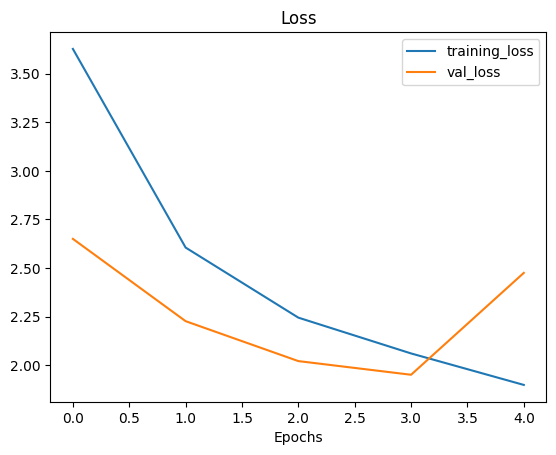

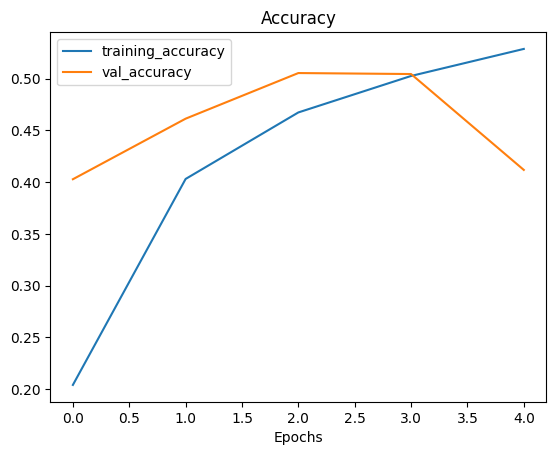

In [15]:

plot_loss_curves(history)